# Analysing and Visualising HealthCare Dataset using Pandas Dataframes

## Imports
Import necessary libraries for data analysis.

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

 Create a directory to store the data (if not already present) and Define the file path and read the CSV file into a DataFrame


In [2]:
os.makedirs('data', exist_ok=True)
filepath = os.path.join('data', 'healthcare_dataset.csv')

In [3]:
df = pd.read_csv(filepath, sep=',', low_memory=False)

Understanding the Dataset

In [5]:
df.shape

(55500, 15)

In [6]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [7]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [9]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [10]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

Check for missing values

In [11]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Inspect the 'Name' column: Look at the first few entries in the 'Name' column. Here we see that the names are not written in a proper format.

In [12]:
df['Name'].head()

0    Bobby JacksOn
1     LesLie TErRy
2      DaNnY sMitH
3     andrEw waTtS
4    adrIENNE bEll
Name: Name, dtype: object

Data Cleaning

In [ ]:
# Rename Columns: Rename 'Name' to 'Patient Name' for clarity.

df.rename(columns={'Name': 'Patient Name'}, inplace=True)

In [14]:
# Standardize 'Patient Name': Normalize the case of the 'Patient Name' by capitalizing the first letter of each name.

df['Patient Name'] = df['Patient Name'].str.title()
df

,Patient Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,Kyle Perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [ ]:
# Remove Duplicates: Remove any duplicate entries in the dataset to ensure data integrity.

df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
# Shape after cleaning: Check the shape of the DataFrame again to ensure duplicates were removed.

df.shape

(54966, 15)

Exploring Data

In [18]:
df['Patient Name'].unique()

array(['Bobby Jackson', 'Leslie Terry', 'Danny Smith', ...,
       'Lisa Simpson', 'Roger Farrell', 'Katherine Webster'],
      shape=(40235,), dtype=object)

In [20]:
df['Patient Name'].value_counts()

Patient Name
Michael Williams     24
Michael Smith        23
Robert Smith         21
James Brown          19
James Smith          18
                     ..
Mary Ellis            1
Zachary Walker        1
Taylor Perkins        1
Daniel Mcdowell       1
Mitchell Williams     1
Name: count, Length: 40235, dtype: int64

In [21]:
df.iloc[0:5]

,Patient Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [23]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [24]:
df['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [25]:
df['Admission Type'].unique()

array(['Urgent', 'Emergency', 'Elective'], dtype=object)

In [26]:
df['Medication'].unique()

array(['Paracetamol', 'Ibuprofen', 'Aspirin', 'Penicillin', 'Lipitor'],
      dtype=object)

In [27]:
df['Blood Type'].unique()

array(['B-', 'A+', 'A-', 'O+', 'AB+', 'AB-', 'B+', 'O-'], dtype=object)

In [28]:
df['Test Results'].unique()

array(['Normal', 'Inconclusive', 'Abnormal'], dtype=object)

Data Transformation

In [30]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], format='ISO8601')
df['Date of Admission']

0       2024-01-31
1       2019-08-20
2       2022-09-22
3       2020-11-18
4       2022-09-19
           ...    
55495   2020-08-16
55496   2020-01-23
55497   2020-07-13
55498   2019-05-25
55499   2024-04-02
Name: Date of Admission, Length: 54966, dtype: datetime64[ns]

In [38]:
df.groupby(['Patient Name', 'Age']).agg({'Doctor': 'min', 'Hospital': 'min'}).reset_index().sort_values(by='Age', ascending=False)

,Patient Name,Age,Doctor,Hospital
37865,Michael Potts,89,Mary Vaughn,"and Perez, Bennett Townsend"
51077,Thomas Phillips,89,Mark White,"and Martin, Davidson Cox"
37252,Michael Dominguez,89,Bridget Irwin,PLC White
23598,Jeremy Hardin Jr.,89,Willie Stevens,Gray-Solomon
14980,Donald Avila,89,Christopher Allen,"Holmes and Howard Castro,"
...,...,...,...,...
20526,James Bass Phd,13,Jennifer Hammond,"Pollard Wallace, Sims and"
44981,Ronald Davis,13,Shannon Butler,"Kelly, and Gomez Williams"
31552,Kyle Jackson,13,Barbara Parsons,Small-Shaw
23072,Jennifer Johnson,13,Denise Mayo,"Banks Gordon and Browning,"


Data Visualization

1. Age Distribution of Patients

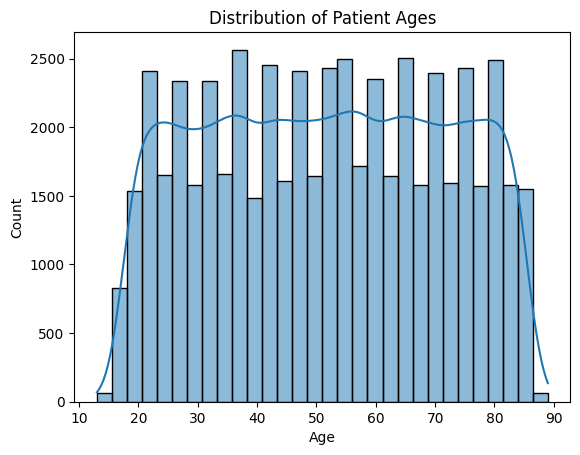

In [46]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

2. Gender Count

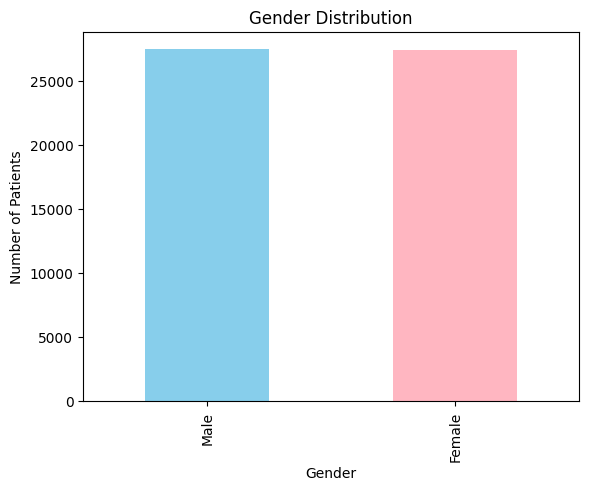

In [47]:
df['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'lightpink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()

3. Medical Condition Frequency

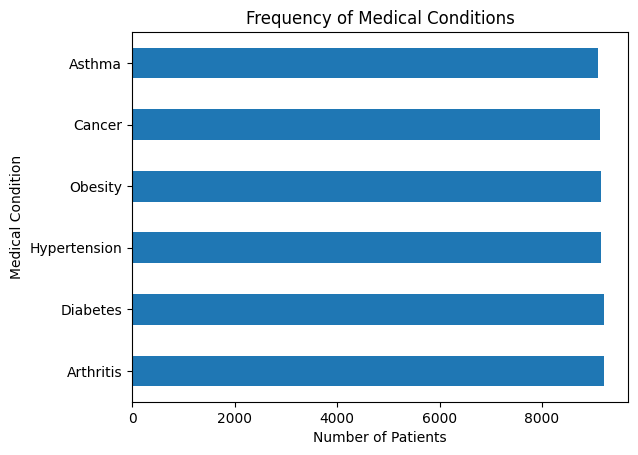

In [48]:
df['Medical Condition'].value_counts().plot(kind='barh')
plt.title('Frequency of Medical Conditions')
plt.xlabel('Number of Patients')
plt.ylabel('Medical Condition')
plt.show()

4. Billing Amount by Medical Condition

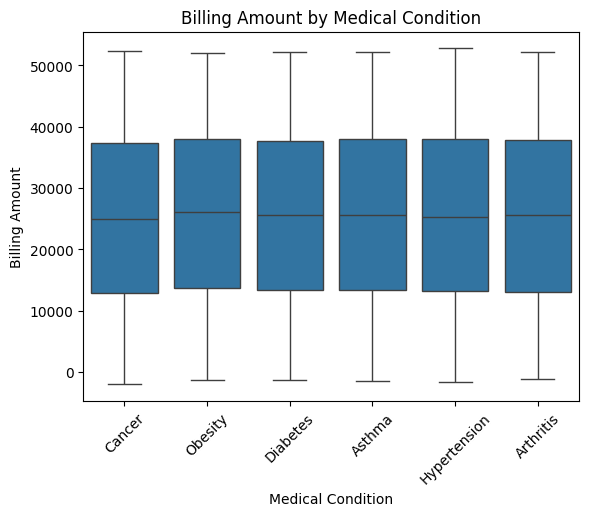

In [49]:
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df)
plt.xticks(rotation=45)
plt.title('Billing Amount by Medical Condition')
plt.show()

5. Admissions Over Time

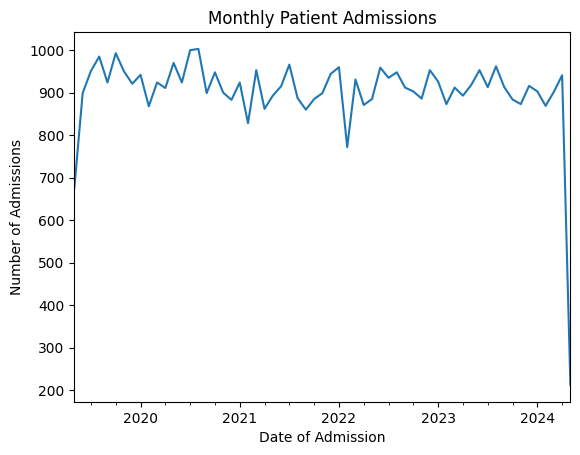

In [51]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df.set_index('Date of Admission', inplace=True)
df.resample('ME').size().plot(kind='line')
plt.title('Monthly Patient Admissions')
plt.ylabel('Number of Admissions')
plt.show()
df.reset_index(inplace=True)

 6. Admission Type Distribution

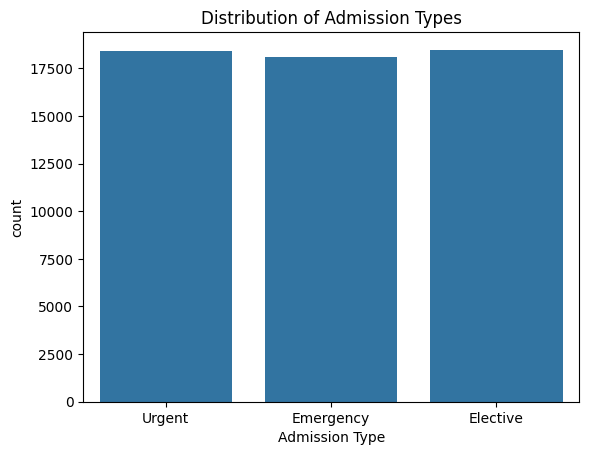

In [52]:
sns.countplot(x='Admission Type', data=df)
plt.title('Distribution of Admission Types')
plt.show()

 8. Medication Usage Count

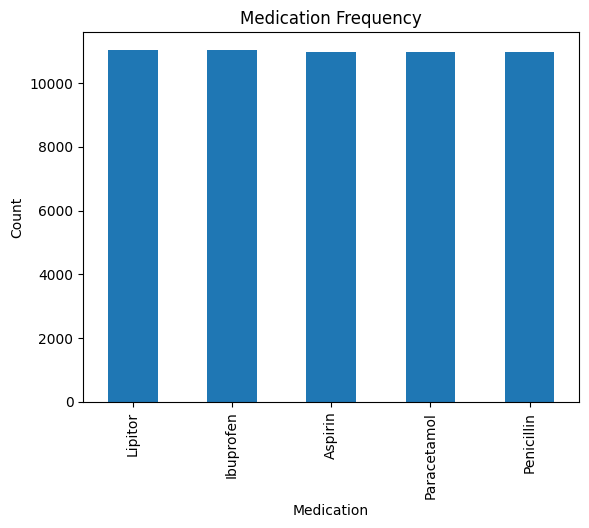

In [53]:
df['Medication'].value_counts().plot(kind='bar')
plt.title('Medication Frequency')
plt.xlabel('Medication')
plt.ylabel('Count')
plt.show()

10. Top 10 Doctors by Number of Patients

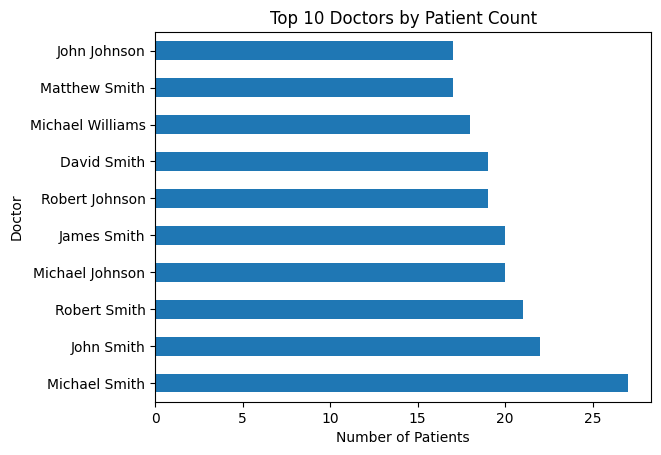

In [54]:
df['Doctor'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Doctors by Patient Count')
plt.xlabel('Number of Patients')
plt.show()

11. Top Hospitals by Number of Patients

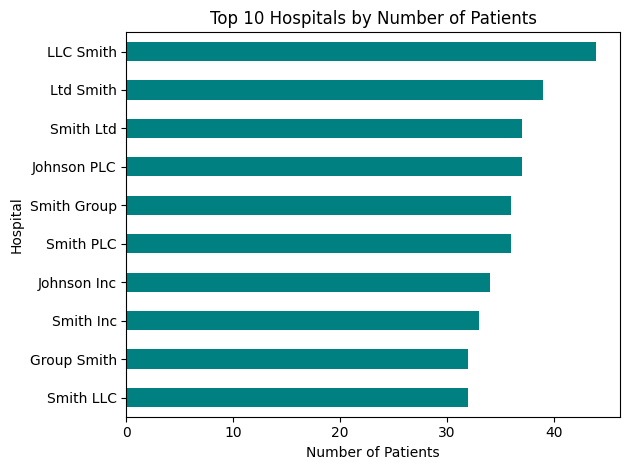

In [55]:
hospital_counts = df['Hospital'].value_counts().head(10)

# Plot
hospital_counts.plot(kind='barh', color='teal')
plt.title('Top 10 Hospitals by Number of Patients')
plt.xlabel('Number of Patients')
plt.ylabel('Hospital')
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()

12. Medical Conditions by Gender

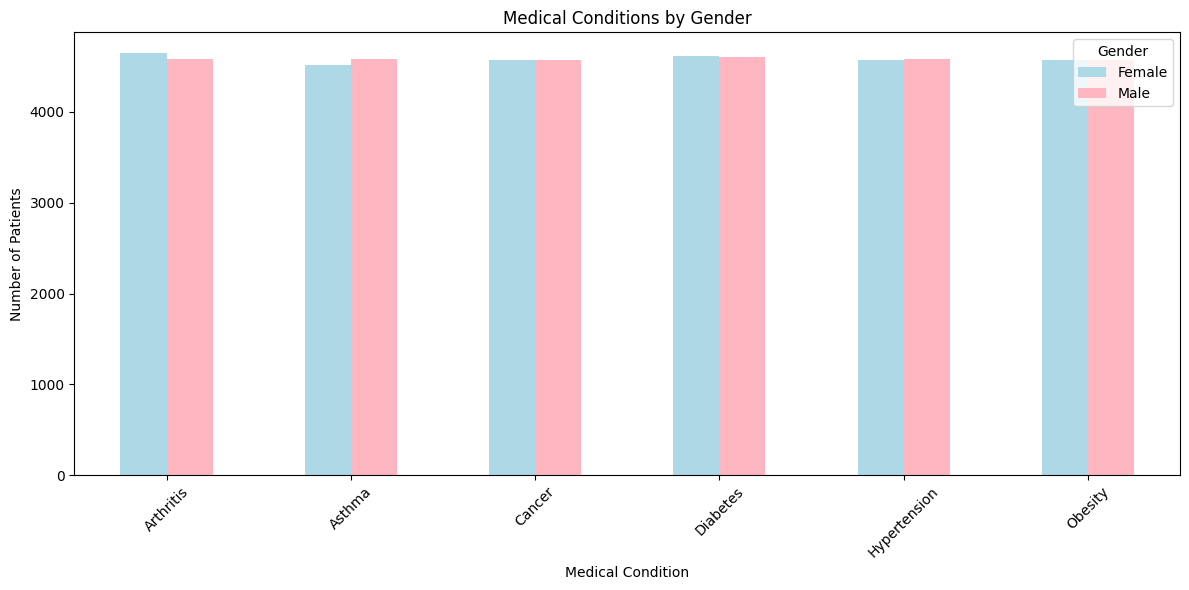

In [57]:
condition_gender = df.groupby(['Medical Condition', 'Gender']).size().unstack().fillna(0)

# Plot
condition_gender.plot(kind='bar', figsize=(12, 6), color=['lightblue', 'lightpink'])
plt.title('Medical Conditions by Gender')
plt.xlabel('Medical Condition')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()